Intro sur elections, police etc
Expliquer qu'on veut faire un lien entre états bleu et rouge

Choix des états: 

mettre

In [48]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy as sp
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
warnings.filterwarnings('ignore')

In [49]:
#DATASET USED:
df = pd.read_csv('data/opp-stops_state.csv')
df = df.dropna()
df.head()

,state,city,geography,subgeography,subject_race,search_rate,stop_rate,hit_rate,inferred_threshold,stops_per_year,stop_rate_n
418,CT,Statewide,CT,Fairfield County,white,0.013487,0.065458,0.356108,0.223550,17189.76,160113.12
419,CT,Statewide,CT,Fairfield County,black,0.029384,0.073116,0.315113,0.171864,5080.32,25650.72
420,CT,Statewide,CT,Fairfield County,hispanic,0.020520,0.039236,0.257426,0.198470,4725.12,21654.72
421,CT,Statewide,CT,Hartford County,white,0.012005,0.065458,0.319820,0.238114,17752.80,160113.12
422,CT,Statewide,CT,Hartford County,black,0.036567,0.073116,0.303398,0.155822,5408.16,25650.72


In [50]:
#Liste des états pour lesquels on a des données pour le threshol et la hit rate.

states = df.groupby('state').nunique()
states.head(10)

,city,geography,subgeography,subject_race,search_rate,stop_rate,hit_rate,inferred_threshold,stops_per_year,stop_rate_n
state,,,,,,,,,,
CT,1,1,7,3,21,3,21,21,21,3
IL,1,1,20,3,60,3,60,60,60,3
NC,1,1,23,3,69,3,68,69,69,3
RI,1,1,4,3,12,3,12,12,12,3
SC,1,1,35,3,105,3,103,105,104,3
TX,1,1,113,3,339,3,335,339,338,3
WA,1,1,19,3,57,3,57,57,57,3
WI,1,1,4,3,12,3,12,12,12,3


In [51]:
#Nos red states seront donc :
#SC et TX (south carolina and texas)
#Blue states:
#IL CT RI (Illinois, Connecticut, Rhode Island)

In [52]:
#Définir array des états bleus et rouges
red_states = ['SC', 'TX']
blue_states  = ['IL', 'CT', 'RI']

#Fonction pour trier les états en blue et red: 
def what_color (name): #retourne toujours none !
    if any(s == name for s in blue_states):
        return 'blue'
    elif any(s == name for s in red_states):
        return 'red'
    else:
        return 'none'
    
def sort_array_of_state(dataframe):
    colors = []
    for state in dataframe['state']:
        colors.append(what_color(state))
    return colors
    
#Trier les états de notre dataframe:
df['party'] = sort_array_of_state(df)

In [53]:
df

,state,city,geography,subgeography,subject_race,search_rate,stop_rate,hit_rate,inferred_threshold,stops_per_year,stop_rate_n,party
418,CT,Statewide,CT,Fairfield County,white,0.013487,0.065458,0.356108,0.223550,17189.760000,160113.120000,blue
419,CT,Statewide,CT,Fairfield County,black,0.029384,0.073116,0.315113,0.171864,5080.320000,25650.720000,blue
420,CT,Statewide,CT,Fairfield County,hispanic,0.020520,0.039236,0.257426,0.198470,4725.120000,21654.720000,blue
421,CT,Statewide,CT,Hartford County,white,0.012005,0.065458,0.319820,0.238114,17752.800000,160113.120000,blue
422,CT,Statewide,CT,Hartford County,black,0.036567,0.073116,0.303398,0.155822,5408.160000,25650.720000,blue
...,...,...,...,...,...,...,...,...,...,...,...,...
3927,WI,Statewide,WI,Kenosha County,black,0.051806,0.032153,0.337143,0.168363,827.265306,11545.959184,none
3928,WI,Statewide,WI,Kenosha County,hispanic,0.034705,0.018971,0.279070,0.170613,606.857143,7220.326531,none
3996,WI,Statewide,WI,Rock County,white,0.024457,0.035205,0.373786,0.227040,4125.551020,165997.224490,none
3997,WI,Statewide,WI,Rock County,black,0.094879,0.032153,0.405858,0.119259,616.897959,11545.959184,none


In [55]:
blue = df[df['party'].str.contains('blue')]
red = df[df['party'].str.contains('red')]

#red states
black_red = red[red['subject_race'].str.contains('black')]
white_red = red[red['subject_race'].str.contains('white')]
hisp_red  = red[red['subject_race'].str.contains('hispanic')]

hit_black_red = black_red[['subgeography', 'hit_rate', 'stops_per_year']]
white_red = white_red.set_index(hit_black_red.index)
hit_black_red['hit_white'] = white_red['hit_rate']

thres_black_red = black_red[['subgeography', 'inferred_threshold', 'stops_per_year']]
thres_black_red['thres_white'] = white_red['inferred_threshold']

hit_hisp_red = hisp_red[['subgeography', 'hit_rate', 'stops_per_year']]
white_red = white_red.set_index(hit_hisp_red.index)
hit_hisp_red['hit_white'] = white_red['hit_rate']

thres_hisp_red = hisp_red[['subgeography', 'inferred_threshold', 'stops_per_year']]
thres_hisp_red['thres_white'] = white_red['inferred_threshold']

hit_nc_red = pd.concat([hit_black_red, hit_hisp_red])
thres_nc_red = pd.concat([thres_black_red, thres_hisp_red])

#blue states
black_blue = blue[blue['subject_race'].str.contains('black')]
white_blue = blue[blue['subject_race'].str.contains('white')]
hisp_blue  = blue[blue['subject_race'].str.contains('hispanic')]

hit_black_blue = black_blue[['subgeography', 'hit_rate', 'stops_per_year']]
white_blue = white_blue.set_index(hit_black_blue.index)
hit_black_blue['hit_white'] = white_blue['hit_rate']

thres_black_blue = black_blue[['subgeography', 'inferred_threshold', 'stops_per_year']]
thres_black_blue['thres_white'] = white_blue['inferred_threshold']

hit_hisp_blue = hisp_blue[['subgeography', 'hit_rate', 'stops_per_year']]
white_blue = white_blue.set_index(hit_hisp_blue.index)
hit_hisp_blue['hit_white'] = white_blue['hit_rate']

thres_hisp_blue = hisp_blue[['subgeography', 'inferred_threshold', 'stops_per_year']]
thres_hisp_blue['thres_white'] = white_blue['inferred_threshold']

hit_nc_blue = pd.concat([hit_black_blue, hit_hisp_blue])
thres_nc_blue = pd.concat([thres_black_blue, thres_hisp_blue])


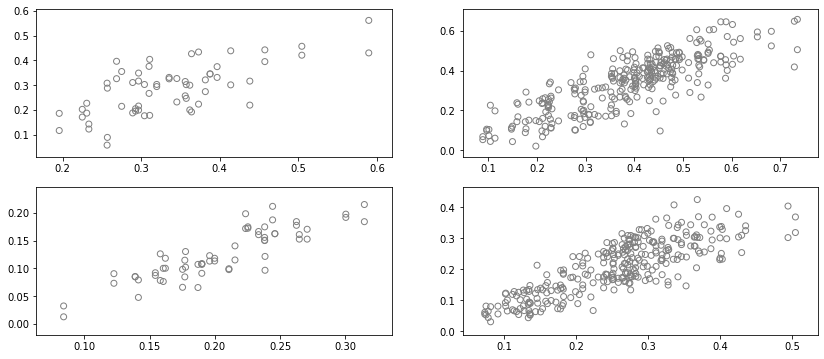

In [57]:
fig, ax = plt.subplots(2,2,figsize=(14,6))
#HIT RATES 
#blue
ax[0,0].scatter(hit_nc_blue.hit_white, hit_nc_blue.hit_rate, facecolors='none', edgecolors='grey')
#red
ax[0,1].scatter(hit_nc_red.hit_white, hit_nc_red.hit_rate, facecolors='none', edgecolors='grey')
#THRESHOLD
#blue
ax[1,0].scatter(thres_nc_blue.thres_white, thres_nc_blue.inferred_threshold, facecolors='none', edgecolors='grey')
#red
ax[1,1].scatter(thres_nc_red.thres_white, thres_nc_red.inferred_threshold, facecolors='none', edgecolors='grey')

plt.show()